In [113]:
import pandas as pd
z=pd.read_csv("https://github.com/nsppolls/nsppolls/raw/master/presidentielle.csv")
z["date"]=pd.to_datetime(z.fin_enquete)
z=z[z.tour=="Premier tour"][["date","candidat","intentions"]]
z=pd.pivot_table(z, index=['date'], columns='candidat', values='intentions')

In [114]:
z

candidat,Anne Hidalgo,Arnaud Montebourg,Bruno Retailleau,Christiane Taubira,Denis Payre,Emmanuel Macron,Eric Ciotti,Eric Piolle,Eric Zemmour,Fabien Roussel,...,Olivier Faure,Philippe Juvin,Philippe Poutou,Rachida Dati,Sandrine Rousseau,Ségolène Royal,Valérie Pécresse,Xavier Bertrand,Yannick Jadot,autre
date,,,,,,,,,,,,,,,,,,,,,
2020-06-19,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,1.500000,...,3.0,NaN,0.500000,NaN,NaN,NaN,NaN,12.000000,8.000000,NaN
2020-07-01,NaN,NaN,NaN,NaN,NaN,30.750000,NaN,NaN,NaN,NaN,...,2.5,NaN,1.875000,NaN,NaN,NaN,NaN,11.000000,9.000000,NaN
2020-09-28,11.000000,NaN,8.0,NaN,NaN,24.636364,NaN,NaN,NaN,1.187500,...,4.2,NaN,2.227273,8.0,NaN,5.0,11.000000,17.214286,8.166667,NaN
2021-01-20,7.000000,5.00,NaN,NaN,NaN,23.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,1.000000,NaN,NaN,NaN,14.000000,16.000000,8.250000,NaN
2021-01-28,11.250000,5.75,NaN,NaN,NaN,25.142857,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.785714,8.900000,2.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-17,2.833333,NaN,NaN,2.333333,NaN,24.666667,NaN,NaN,15.000000,4.166667,...,NaN,NaN,0.333333,NaN,NaN,NaN,15.000000,NaN,5.333333,NaN
2022-02-18,2.500000,NaN,NaN,2.750000,NaN,24.500000,NaN,NaN,15.750000,4.500000,...,NaN,NaN,0.000000,NaN,NaN,NaN,15.000000,NaN,5.250000,NaN
2022-02-21,2.333333,NaN,NaN,2.166667,NaN,24.500000,NaN,NaN,15.166667,4.000000,...,NaN,NaN,0.666667,NaN,NaN,NaN,14.166667,NaN,5.166667,NaN


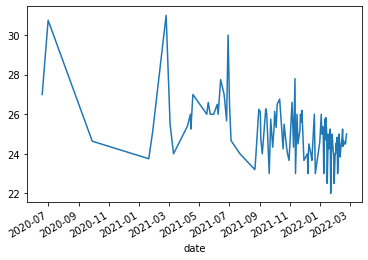

In [120]:
z["Emmanuel Macron"].plot()

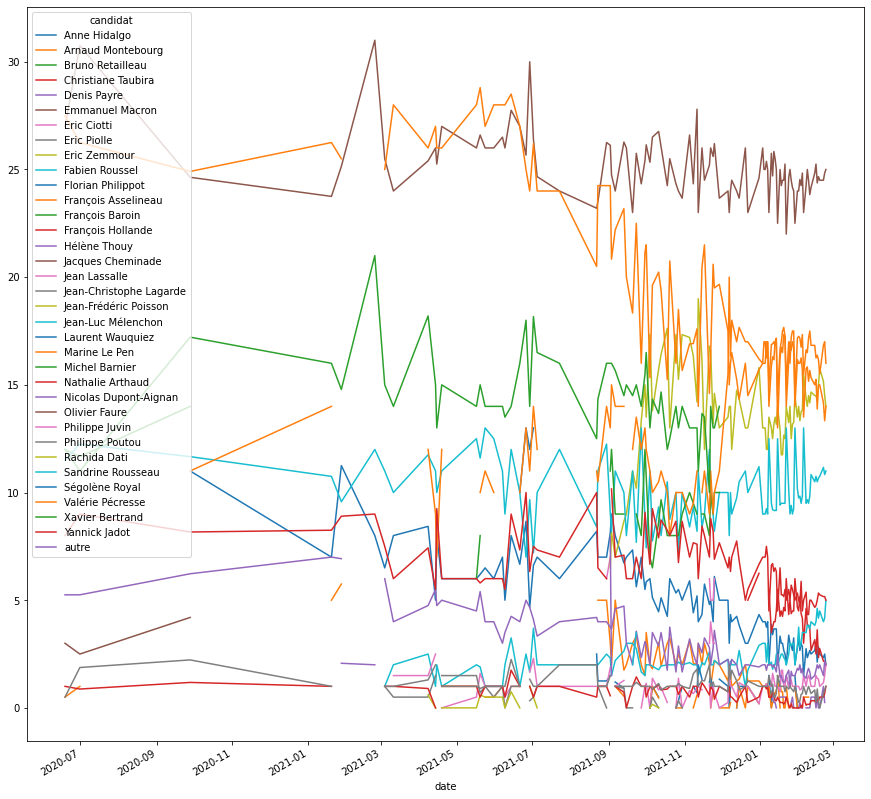

In [119]:
z.plot(figsize=(15,15))

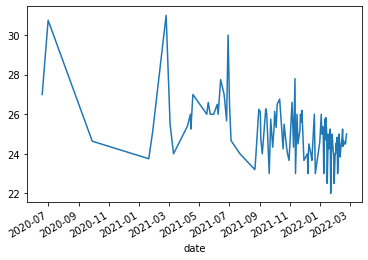

In [93]:
import locale
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')
pd.to_datetime(d.Date.str.split("-",expand=True)[1].str.title(),format='%d %B')

ValueError: time data '16 Févrer' does not match format '%d %B' (match)

In [91]:
locale.

6

In [86]:
d.Date.str.split("-",expand=True)[1].apply(parser.parse)

ValueError: ('Unknown string format:', '23 février')